# Atelier 2 : Vectorisation

# 1.	Objectif


L’objectif de cet atelier est de decouvrire les techniques courantes de vectorisation de documents text ansi que les differents algorithmes permettant de caculer la similarité ou la distance entre les document texte.


# 2. Méthodes Basiques

Afin de simplifier l’analyse des données texte, il est recommandé d’utiliser des représentations plus consistantes qu’une simple segmentation. Il faut bien évidement réaliser des prétraitements telles que la racinisation, la lemmatisation, supprimer les redondances, supprimer les mots qui représentent le même sens. Mais c’est encore insuffisant pour obtenir un modèle représentatif qui reflète l’importance et le sens exacte de chaque mot dans une expression ou dans un document texte.
Afin de repondre à ce besoin, plusieurs représentations vectorielles des termes contenus dans un texte sont possibles : one-hot-vector, Bag-of-words, TF-IDF, SVD, Word2vec... Nous utilisant scikitlearn pour réaliser ces différentes représentations vectorielles. Ça n’empêche pas que ces représentations vectorielles peuvent être obtenues en faisant du codage from scratch.

In [2]:
# !pip install -U scikit-learn


## 2.1. One-hot-vector

Le modèle commence par la création d’un vocabulaire à partir du corpus formé par tous les documents ou les expressions texte et determine par la suite pour chaque document/expression la présence de chaque terme du vocabulaire.

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.preprocessing import Binarizer

freq   = CountVectorizer()
corpus = ['This is the first document.','This is the second second document.','And the third one.','Is this the first document?']
corpus=[ sent.lower() for sent in corpus]
corpus = freq.fit_transform(corpus)
print(f"Frequence of word {corpus}")
onehot = Binarizer()
corpus = onehot.fit_transform(corpus.toarray())
print(corpus)

Frequence of word   (0, 8)	1
  (0, 3)	1
  (0, 6)	1
  (0, 2)	1
  (0, 1)	1
  (1, 8)	1
  (1, 3)	1
  (1, 6)	1
  (1, 1)	1
  (1, 5)	2
  (2, 6)	1
  (2, 0)	1
  (2, 7)	1
  (2, 4)	1
  (3, 8)	1
  (3, 3)	1
  (3, 6)	1
  (3, 2)	1
  (3, 1)	1
[[0 1 1 1 0 0 1 0 1]
 [0 1 0 1 0 1 1 0 1]
 [1 0 0 0 1 0 1 1 0]
 [0 1 1 1 0 0 1 0 1]]


## 2.2.	Beg-of-words

Pour la représentation vectorielle Bag-of-Words, le modèle commence par la création d’un vocabulaire à partir du corpus formé par tous les documents ou les expressions texte et calcul par la suite pour chaque document/expression le nombre d’occurrences de chaque terme du vocabulaire.



In [3]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
corpus = ['This is the first document.','This is the second  document.','And the third one.','Is this the first document?']
corpus=[ sent.lower() for sent in corpus]
X = vectorizer.fit_transform(corpus) #sparsy format
print(X.toarray()) # explicit matrix format
print(vectorizer.get_feature_names_out() ) #vocabulary as list of string
print(vectorizer.vocabulary_.get('document')) #get column index of a specific term in the vocabulary
vectorizer.transform(['Something completely new.']).toarray()#apply the model to a new document

[[0 1 1 1 0 0 1 0 1]
 [0 1 0 1 0 1 1 0 1]
 [1 0 0 0 1 0 1 1 0]
 [0 1 1 1 0 0 1 0 1]]
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
1


array([[0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

## 2.3.	TF-IDF

La représentation vectorielle Bag-of-Words considère la fréquence d’apparition des termes du vocabulaire dans chaque document du corpus séparément des autres. Cette représentation néglige l’importance du terme par rapport au corpus tout en entier.  TF-IDF (term-frequency times inverse document-frequency) est un autre modèle de représentation vectorielle des occurrences des termes d’un document en considérant également leurs occurrences dans tout le corpus. Cette approche va permettre de diminuer l’importance des termes les plus fréquents dans des documents texte tels que les stop words.

tf-idf(t,d)=tf(t,d)×idf(t).

idf(t)=log[(1+n)/(1+df(t))]+1
n: la taille du corpus.
df(t) :  le nombre de documents qui comportent le terme t.

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = ['This is the first document.','this is the second second Document.','And the third one.','Is this the first document?']
vectorizer = TfidfVectorizer()
X=vectorizer.fit_transform(corpus)
print(X.toarray())
print(vectorizer.get_feature_names_out() )

#NB: le vecteur tf-idf obtenu sera normalisé pour obtenir des valeurs entre 0 et 1.

[[0.         0.43877674 0.54197657 0.43877674 0.         0.
  0.35872874 0.         0.43877674]
 [0.         0.27230147 0.         0.27230147 0.         0.85322574
  0.22262429 0.         0.27230147]
 [0.55280532 0.         0.         0.         0.55280532 0.
  0.28847675 0.55280532 0.        ]
 [0.         0.43877674 0.54197657 0.43877674 0.         0.
  0.35872874 0.         0.43877674]]
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [5]:
X.shape

(4, 9)

## 2.4. Exercice 1: Detection du plagiarisme Approche syntaxique

On va reprendre l'exercice de detection du plagiarisme en se bsant sur une representation vectorielle des document du corpus.

Pour la similarité syntaxique entre des vecteurs, plusieurs distances sont possibles à savoir : distance euclidienne, Cosine Jaccard, Levenshtein, Hamming…

l'exemple ci-dessous permet de calculer la similarité syntaxique entre les documents en se basant sur une representation vectorielle en TFIDF avec la distance euclidienne et la distance cosine.

In [6]:
from sklearn.metrics.pairwise import cosine_distances,euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vectorizer = TfidfVectorizer()
corpus = ['This is the first document.','This is the second second document.','And the third one.','Is this the first document?']
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
tfidf_matrix.shape

#compute similarity for first sentence with rest of the sentences
print(euclidean_distances(tfidf_matrix[0],tfidf_matrix))
print(cosine_distances(tfidf_matrix[0],tfidf_matrix))


[[0.         1.05990529 1.33904078 0.        ]]
[[0.         0.56169962 0.8965151  0.        ]]


In [7]:
tfidf_vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [8]:
import glob, os
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


path = 'c:/Users/dscon/Documents/COURS UM6P/S3/TEXT-MINING/final_df.csv'
df = pd.read_csv(path)


stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

In [9]:
def classify_similarity(similarity):
    if similarity >= 0.75:
        return 'cut'      
    elif similarity >= 0.50:
        return 'heavy'
    elif similarity >= 0.25:
        return 'light'
    else:
        return 'non'

In [10]:
sub_df = df[['User', 'Task', 'OResponse', 'UResponse', 'Category']]
sub_df

,User,Task,OResponse,UResponse,Category
0,g0pA,a,"In object-oriented programming, inheritance is...",Inheritance is a basic concept of Object-Orien...,non
1,g0pB,a,"In object-oriented programming, inheritance is...",Inheritance is a basic concept in object orien...,non
2,g0pC,a,"In object-oriented programming, inheritance is...",inheritance in object oriented programming is ...,heavy
3,g0pD,a,"In object-oriented programming, inheritance is...",Inheritance in object oriented programming is ...,cut
4,g0pE,a,"In object-oriented programming, inheritance is...","In object-oriented programming, inheritance is...",light
...,...,...,...,...,...
90,g3pC,e,"In mathematics and computer science, dynamic p...","In computer science and mathematics, dynamic p...",light
91,g4pB,e,"In mathematics and computer science, dynamic p...","In mathematics and computer science, dynamic p...",cut
92,g4pC,e,"In mathematics and computer science, dynamic p...","In mathematics and computer science, dynamic p...",light
93,g4pD,e,"In mathematics and computer science, dynamic p...",Dynamic programming is a method of providing s...,heavy


* Realiser la même chose en se basant sur les representations OHV et BOW?
* Comparer les performances des trois methodes en terme de temps d'execution et precision?

**2. Méthode OHV, BOW, TFIDF**

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import time



# Fonction de classification en fonction de la similarité
def classify_similarity(similarity):
    if similarity >= 0.75:
        return 'cut'
    elif similarity >= 0.50:
        return 'heavy'
    elif similarity >= 0.25:
        return 'light'
    else:
        return 'non'

def split_into_segments(text):
    return text.split('.')  # Séparation par les points pour obtenir des sous-phrases

# Fonction de calcul de similarité avec décomposition et fusion des résultats
def calculate_combined_similarity(df, vectorizer):
    combined_similarities = []
    
    for i, row in df.iterrows():
        student_segments = split_into_segments(row['OResponse'])
        original_segments = split_into_segments(row['UResponse'])
        
        student_vectors = vectorizer.fit_transform(student_segments)
        original_vectors = vectorizer.transform(original_segments)
        
        segment_similarities = cosine_similarity(student_vectors, original_vectors)
        combined_similarity = np.mean(segment_similarities.max(axis=1))
        combined_similarities.append(combined_similarity)
    
    return np.array(combined_similarities)

# Fonctions de similarité pour chaque modèle
def tfidf_similarity(df):
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))
    return calculate_combined_similarity(df, tfidf_vectorizer)

def ohv_similarity(df):
    ohv_vectorizer = CountVectorizer(binary=True)
    return calculate_combined_similarity(df, ohv_vectorizer)

def bow_similarity(df):
    bow_vectorizer = CountVectorizer(ngram_range=(1, 3))
    return calculate_combined_similarity(df, bow_vectorizer)

# Appliquer et concaténer les classifications
def apply_and_concat_classifications(df):
    # Calculer les similarités et classifications pour chaque modèle et mesurer le temps d'exécution
    
    start_time = time.time()
    tfidf_similarities = tfidf_similarity(df)
    end_time_tfidf = time.time() - start_time
    
    start_time = time.time()
    ohv_similarities = ohv_similarity(df)
    end_time_ohv = time.time() - start_time
    
    start_time = time.time()
    bow_similarities = bow_similarity(df)
    end_time_bow = time.time() - start_time
    times = {
        'TFIDF_Time': end_time_tfidf,
        'OHV_Time': end_time_ohv,
        'BOW_Time': end_time_bow
    }
    

    # Générer les classifications
    df['TFIDF_Similarity'] = tfidf_similarities
    df['TFIDF_Category'] = [classify_similarity(sim) for sim in tfidf_similarities]

    df['OHV_Similarity'] = ohv_similarities
    df['OHV_Category'] = [classify_similarity(sim) for sim in ohv_similarities]

    df['BOW_Similarity'] = bow_similarities
    df['BOW_Category'] = [classify_similarity(sim) for sim in bow_similarities]

    return df, times


def accuracy_score(y_true, y_pred):
    return sum(y_true == y_pred) / len(y_true)

def compute_accuracies(df):
    tfidf_accuracy = accuracy_score(df['Category'], df['TFIDF_Category'])
    ohv_accuracy = accuracy_score(df['Category'], df['OHV_Category'])
    bow_accuracy = accuracy_score(df['Category'], df['BOW_Category'])
    
    return {
        'TFIDF_Accuracy': tfidf_accuracy,
        'OHV_Accuracy': ohv_accuracy,
        'BOW_Accuracy': bow_accuracy
    }

# Calculer la précision pour chaque modèle
def calculate_accuracy(df):
    tfidf_accuracy = accuracy_score(df['Category'], df['TFIDF_Category'])
    ohv_accuracy = accuracy_score(df['Category'], df['OHV_Category'])
    bow_accuracy = accuracy_score(df['Category'], df['BOW_Category'])

    return tfidf_accuracy, ohv_accuracy, bow_accuracy

# Appliquer les classifications et mesurer la précision
start_time = time.time()
result_df, times = apply_and_concat_classifications(sub_df)
execution_time = time.time() - start_time

tfidf_accuracy, ohv_accuracy, bow_accuracy = calculate_accuracy(result_df)

print(f"Temps d'exécution total : {execution_time:.2f} secondes")
print(f"Précision TF-IDF : {tfidf_accuracy:.2%} --- Temps d'exécution : {times['TFIDF_Time']:.2f} secondes")
print(f"Précision OHV : {ohv_accuracy:.2%} --- Temps d'exécution : {times['OHV_Time']:.2f} secondes")
print(f"Précision BOW : {bow_accuracy:.2%} -- Temps d'exécution : {times['BOW_Time']:.2f} secondes")
result_df.head()

Temps d'exécution total : 0.67 secondes
Précision TF-IDF : 55.79% --- Temps d'exécution : 0.30 secondes
Précision OHV : 21.05% --- Temps d'exécution : 0.13 secondes
Précision BOW : 46.32% -- Temps d'exécution : 0.23 secondes


C:\Users\dscon\AppData\Local\Temp\ipykernel_14856\4044609085.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TFIDF_Similarity'] = tfidf_similarities
C:\Users\dscon\AppData\Local\Temp\ipykernel_14856\4044609085.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TFIDF_Category'] = [classify_similarity(sim) for sim in tfidf_similarities]
C:\Users\dscon\AppData\Local\Temp\ipykernel_14856\4044609085.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,User,Task,OResponse,UResponse,Category,TFIDF_Similarity,TFIDF_Category,OHV_Similarity,OHV_Category,BOW_Similarity,BOW_Category
0,g0pA,a,"In object-oriented programming, inheritance is...",Inheritance is a basic concept of Object-Orien...,non,0.138380,non,0.291059,light,0.201791,non
1,g0pB,a,"In object-oriented programming, inheritance is...",Inheritance is a basic concept in object orien...,non,0.152345,non,0.300690,light,0.207600,non
2,g0pC,a,"In object-oriented programming, inheritance is...",inheritance in object oriented programming is ...,heavy,0.251135,light,0.370319,light,0.293016,light
3,g0pD,a,"In object-oriented programming, inheritance is...",Inheritance in object oriented programming is ...,cut,0.508745,heavy,0.578006,heavy,0.529381,heavy
4,g0pE,a,"In object-oriented programming, inheritance is...","In object-oriented programming, inheritance is...",light,0.822884,cut,0.837157,cut,0.826927,cut


**`Resultats`**

Temps d'exécution total : 0.85 secondes
* Précision TF-IDF : 55.79% --- Temps d'exécution : 0.34 secondes
* Précision OHV : 21.05% --- Temps d'exécution : 0.23 secondes
* Précision BOW : 46.32% -- Temps d'exécution : 0.29 secondes


**`Conclusion`**
La méthode **TF-IDF** permet de mieux représenter les vecteurs comparativement aux autres methodes (BOW, OHV) 

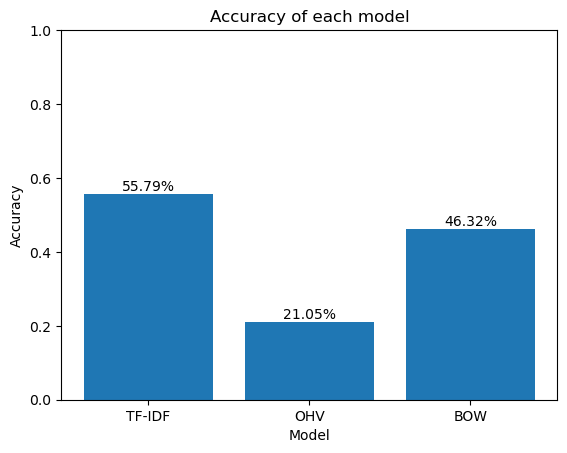

In [13]:
# plot the accuracy of each model
import matplotlib.pyplot as plt

accuracies = [tfidf_accuracy, ohv_accuracy, bow_accuracy]
models = ['TF-IDF', 'OHV', 'BOW']

plt.bar(models, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of each model')
# show labels on top of bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{acc:.2%}', ha='center', va='bottom')
plt.ylim(0, 1)

plt.show()


# 3.	Methodes Avancées


* Installer Gensim: pip install --upgrade gensim
* Recuperer le dataset du plagiarisme?
* Réaliser les différentes tâches de prétraitement?
* Generer le vocabulaire sous forme d'une liste de termes distincts qui est triée dans l'ordre lexicograpique


In [14]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import glob
import os
import pandas as pd

sub_df_step_3 = df[['User', 'Task', 'OResponse', 'UResponse', 'Category']]

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

corpus = sub_df_step_3['UResponse'].apply(preprocess_text).tolist()

lemmatizer = WordNetLemmatizer()

corpus_lemmatized = [' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text)]) for text in corpus]
vocabulary = list(set(' '.join(corpus_lemmatized).split()))
vocabulary.sort()



In [15]:
vocabulary[:10]

['abab',
 'ability',
 'able',
 'abstraction',
 'abstractly',
 'abused',
 'academic',
 'acceptable',
 'accepted',
 'access']

## 3.2.	Approche à base des Cooccurrences

In [16]:
# !pip install nltk
import nltk
# nltk.download('all')

* Construire une matrice carrée des cooccurrences (Terme à Terme) pour  une fenêtre de taille 𝑛 en considérant les n mots  avant et après le mot  central de la fenêtre.


In [17]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemmmatizer=WordNetLemmatizer()



corpus = ['This is the first document.','This is the second second document.','And the third one.','Is this the first document?']
corpus_lemetized=[]

for doc in corpus:
    words = word_tokenize(doc)
    words = [lemmmatizer.lemmatize(word.lower()) for word in words if(not word in set(stopwords.words('english')) and  word.isalpha())]
    corpus_lemetized.append(words)


vocabulary = []
for doc in corpus_lemetized:
    for word in doc:
        if word.lower() not in vocabulary:
            vocabulary.append(word.lower())
vocabulary.sort()
vocabulary


['and', 'document', 'first', 'is', 'one', 'second', 'third', 'this']

In [18]:
V=len(vocabulary)
import numpy as np

M=np.zeros((V,V))
n=4
for doc in corpus_lemetized:
    T=len(doc)-2*n+1 if n<len(doc) else 1
    for t in range(T):
        borne=len(doc) if t+n>len(doc) else t+n
        for w1 in doc[t:borne]:
            for w2 in doc[t:borne]:
                if w1!=w2:
                    M[vocabulary.index(w1)][vocabulary.index(w2)]+=1

In [19]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
svd = TruncatedSVD(n_components=2)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
vectors = lsa.fit_transform(M)


* Construire une matrice carrée des cooccurrences (Terme à Terme) pour  une fenêtre de taille 𝑛 en considérant les n mots  avant et après le mot  central de la fenêtre.


In [20]:
print("Matrice de cooccurrences (Terme à Terme) :")
print(M)

Matrice de cooccurrences (Terme à Terme) :
[[0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 2. 1. 0. 2. 0. 2.]
 [0. 2. 0. 1. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 2. 0. 0. 0. 0. 0. 2.]
 [1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 2. 1. 0. 0. 2. 0. 0.]]


* Appliquer La SVD pour obtenir une representation vectorielle des differents mots du vocabulaire dans un espace de dimension 2.

In [21]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
svd = TruncatedSVD(n_components=2)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
vectors = lsa.fit_transform(M)


* En se servant de la bibliotheque matplotlib Tracer les vecteurs obtenus dans un plan 2D

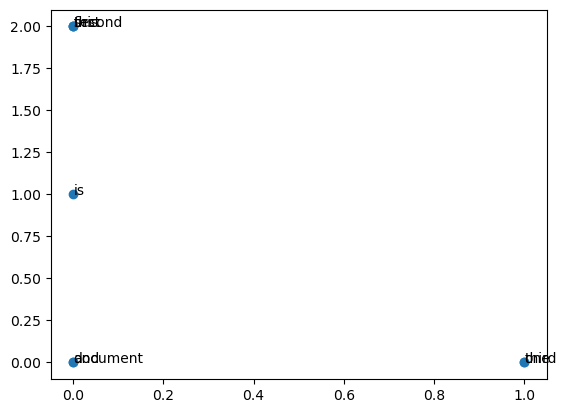

In [22]:
from matplotlib import pyplot
x=[M[i][0] for i in range(V)]
y=[M[i][1] for i in range(V)]
fig, ax = pyplot.subplots()
ax.scatter(x, y)
for i, txt in enumerate(vocabulary):
    ax.annotate(txt, (x[i], y[i]))

### Exercice


* Récuperer le dataset du plagiarisme?
* Réaliser les différentes tâches de prétraitement?
* Récuperer la représetation vectorielle des differents document du corpus
* Appliquer La SVD pour reduire la dimesion de la representation vectorielle des termes pour les representer dans un espace de dimension 2
* Tracer les vecteurs obtenus en se servant de la bibliotheque matplolib

* En se servant de la représentation vectorielle obtenue, calculer les similarités entre les réponses des étudiants et les définitions trouvées sur Wikipédia. Réaliser une représentation vectorielle des documents en se basant sur les représentations vectorielles de leurs mots (une moyenne par exemple) et utiliser par la suite la distance euclidienne ou la distance corsinus.








**Solutions**

C:\Users\dscon\AppData\Local\Temp\ipykernel_14856\1503695563.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df_step_3['Processed'] = sub_df_step_3['UResponse'].apply(preprocess_text)


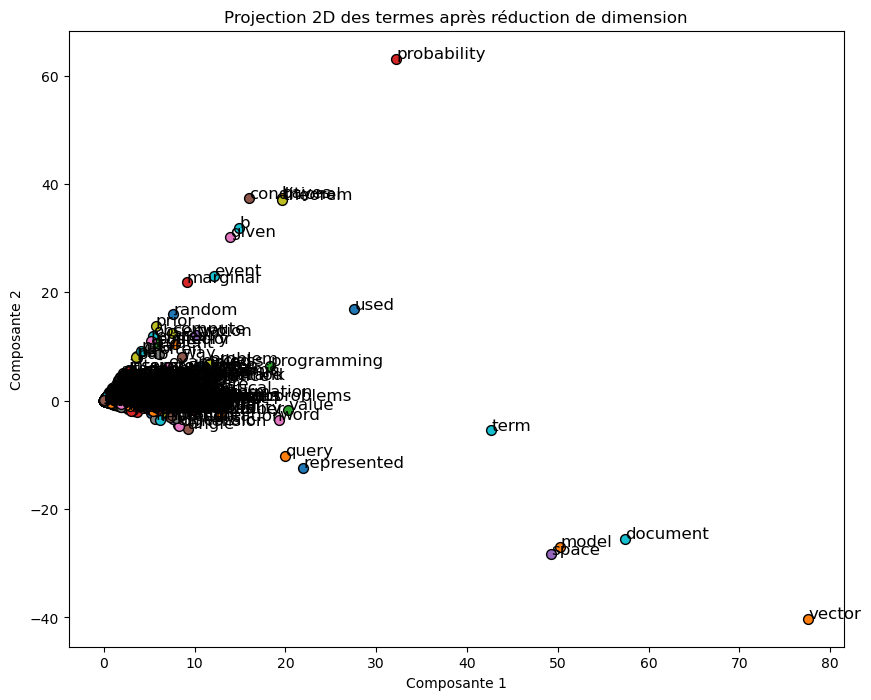

Similarités cosinus entre les documents :
 [[1.         0.98469478 0.99842449 ... 0.99578533 0.99736482 0.99491966]
 [0.98469478 1.         0.99292299 ... 0.99652934 0.9947444  0.9972381 ]
 [0.99842449 0.99292299 1.         ... 0.99936274 0.99986434 0.99900105]
 ...
 [0.99578533 0.99652934 0.99936274 ... 1.         0.9998151  0.99995951]
 [0.99736482 0.9947444  0.99986434 ... 0.9998151  1.         0.99960157]
 [0.99491966 0.9972381  0.99900105 ... 0.99995951 0.99960157 1.        ]]


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from collections import Counter
from sklearn.preprocessing import normalize


# Fonction de prétraitement
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words("english"))
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return words

# Appliquer le prétraitement
sub_df_step_3['Processed'] = sub_df_step_3['UResponse'].apply(preprocess_text)

# Créer le vocabulaire
vocab = sorted(set(word for doc in sub_df_step_3['Processed'] for word in doc))
word_to_id = {word: idx for idx, word in enumerate(vocab)}
V = len(vocab)

# Matrice de cooccurrence
cooccurrence_matrix = np.zeros((V, V))
window_size = 2

for doc in sub_df_step_3['Processed']:
    for idx, word in enumerate(doc):
        word_id = word_to_id[word]
        start = max(0, idx - window_size)
        end = min(len(doc), idx + window_size + 1)
        for neighbor in doc[start:end]:
            if neighbor != word:
                neighbor_id = word_to_id[neighbor]
                cooccurrence_matrix[word_id][neighbor_id] += 1

# Réduction de dimension avec SVD
svd = TruncatedSVD(n_components=2)
reduced_matrix = svd.fit_transform(cooccurrence_matrix)

# Visualisation avec matplotlib
plt.figure(figsize=(10, 8))
for i, word in enumerate(vocab):
    plt.scatter(reduced_matrix[i, 0], reduced_matrix[i, 1], edgecolor='k', s=50)
    plt.text(reduced_matrix[i, 0] + 0.02, reduced_matrix[i, 1] + 0.02, word, fontsize=12)
plt.title("Projection 2D des termes après réduction de dimension")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.show()

# Calcul de similarité entre documents
def compute_document_vector(doc):
    doc_vector = np.mean([reduced_matrix[word_to_id[word]] for word in doc if word in word_to_id], axis=0)
    return doc_vector

doc_vectors = [compute_document_vector(doc) for doc in sub_df_step_3['Processed']]

# Similarités cosinus entre documents
similarities = cosine_similarity(doc_vectors)
print("Similarités cosinus entre les documents :\n", similarities)


## 3.3.	Approchee iteratives

### Word2Vec

Word2Vec est un algorithme à base des réseaux de neurones et qui permet d'avoir une représentation vectorielle des mots contenus dans un corpus très large de documents texte de telle sorte que les mots qui se répètent toujours ensemble dans les mêmes contextes auront des représentations vectorielles similaires.

L'algorithme word2Vect doit tourner sur un corpus très large de documents texte afin d'obtenir un modèle donnant une bonne représentation vectorielle d'un nombre important de mots. Cela nécessitera bien évidement un temps considérable pendant le processus d'apprentissage et nécessitera également des ressources importantes en matière de CPU et de RAM.

La librairie Gensim fourni une implémentation de l'algorithme Word2Vec avec des modèles préétablis qui peuvent être exploités dans la comparaison de documents texte :

    *fasttext-wiki-news-subwords-300
    *conceptnet-numberbatch-17-06-300
    *word2vec-ruscorpora-300
    *word2vec-google-news-300
    *glove-wiki-gigaword-50
    *glove-wiki-gigaword-100
    *glove-wiki-gigaword-200
    *glove-wiki-gigaword-300
    *glove-twitter-25
    *glove-twitter-50
    *glove-twitter-100
    *glove-twitter-200

Ci-dessous un code permettant de récupérer le modèle préétabli contenant 1193514 mots représentés dans un espace vectoriel de dimension 25

In [24]:
import gensim.downloader
glove_vectors = gensim.downloader.load('glove-twitter-25')


Le modèle préétablis peut être utilisé pour récupérer les représentations vectorielles des mots comme ci-dessous.

In [25]:
vec_data = glove_vectors['data']
print(vec_data)

[ 1.1666    0.35531  -0.29362  -0.52206   1.4224   -0.30116   0.045792
 -0.028705  1.8792    0.28175   0.55703  -0.71944  -3.0101    0.41258
  0.3052   -0.12702  -0.25783   0.90687  -0.026371 -1.0942   -1.03
 -1.2379   -0.65783   0.14663  -1.3532  ]


Genism offre plusieurs fonctions permettant de récupérer et d'exploiter les similarités entre les mots en se basant sur leurs représentations vectorielles.

* Le code ci-deesous permet de recuperer les 10 terms les plus similaires à un terme donné.

In [26]:
glove_vectors.most_similar('data',topn=10)

[('mobile', 0.8975884914398193),
 ('software', 0.867477297782898),
 ('search', 0.8633924722671509),
 ('survey', 0.8620768189430237),
 ('web', 0.8545363545417786),
 ('server', 0.854297935962677),
 ('marketing', 0.8416521549224854),
 ('file', 0.8381796479225159),
 ('system', 0.8372836112976074),
 ('google', 0.8370377421379089)]

* Le code ci-dessous permet de récupérer l'ordre de similarité entre deux termes?

In [27]:
glove_vectors.similarity('data', 'information')

0.8011154

* Le code ci-dessous permet de récupérer le terme le moins convenable dans un ensemble de termes en se basant sur leurs similarités.

In [28]:
print(glove_vectors.doesnt_match(['data', 'information', 'processing', 'computer', 'car','machine','dashboard']))

car


Bien évidemment, on peut apprendre notre propre modèle en suivant les étapes ci-dessous

   * Récupérer le corpus (Voir le code dans la section 1)
   * Réaliser les prétraitements nécessaires pour obtenir la liste des documents segmentés: une liste de listes tq chaque sous listes comporte les mots d'un documents du corpus.

In [29]:
from nltk.tokenize import word_tokenize

corpus = ['This is the first document.','This is the second second document.','And the third one.','Is this the first document?']

corpus_lemetized=[]
for doc in corpus:
    words = word_tokenize(doc)
    words = [lemmatizer.lemmatize(word.lower()) for word in words if(word not in set(stopwords.words('english')) and  word.isalpha())]
    corpus_lemetized.append(words)
corpus_lemetized




[['this', 'first', 'document'],
 ['this', 'second', 'second', 'document'],
 ['and', 'third', 'one'],
 ['is', 'first', 'document']]

Pour générer le modèle

In [30]:
from gensim.models import Word2Vec
from gensim.test.utils import datapath
from gensim.models.word2vec import PathLineSentences
model = Word2Vec(sentences=corpus_lemetized, vector_size=10, window=3, min_count=1, workers=2)


Pour récupérer la representation vectorielle d'un mot:   

In [31]:
if 'data' in model.wv:
    print(model.wv['data'])
else:
    print("Key 'data' not present in the model vocabulary")


Key 'data' not present in the model vocabulary


Pour récupérer tous les vecteurs

In [32]:
vectors=model.wv.vectors
vectors

array([[-0.00536227,  0.00236431,  0.0510335 ,  0.09009273, -0.0930295 ,
        -0.07116809,  0.06458873,  0.08972988, -0.05015428, -0.03763372],
       [ 0.07380505, -0.01533471, -0.04536613,  0.06554051, -0.0486016 ,
        -0.01816018,  0.0287658 ,  0.00991874, -0.08285215, -0.09448818],
       [ 0.07311766,  0.05070262,  0.06757693,  0.00762866,  0.06350891,
        -0.03405366, -0.00946401,  0.05768573, -0.07521638, -0.03936104],
       [-0.07511582, -0.00930042,  0.09538119, -0.07319167, -0.02333769,
        -0.01937741,  0.08077437, -0.05930896,  0.00045162, -0.04753734],
       [-0.0960355 ,  0.05007293, -0.08759586, -0.04391825, -0.000351  ,
        -0.00296181, -0.0766124 ,  0.09614743,  0.04982058,  0.09233143],
       [-0.08157917,  0.04495798, -0.04137076,  0.00824536,  0.08498619,
        -0.04462177,  0.045175  , -0.0678696 , -0.03548489,  0.09398508],
       [-0.01577653,  0.00321372, -0.0414063 , -0.07682689, -0.01508008,
         0.02469795, -0.00888027,  0.05533662

Recuperer tous le smots

In [33]:
words = model.wv.index_to_key
words

['document', 'second', 'first', 'this', 'is', 'one', 'third', 'and']

### Doc2Vec

Doc2Vec est une implémentation de l'algorithme Paragraph Vector qui est basé sur Word2Vec et qui est plus adapté à la comparaison de documents texte en se basant sur leur représentations vectorielles.

Cet algorithme dépasse dans sa performance l’utilisation des moyenne des représentations vectorielles des mots présents dans un documents texte.


* Pour génerer le modèle

In [34]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(corpus_lemetized)]
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

* Pour récupérer la representation vectorielle de tous les documents   

In [35]:
vectors=model.dv.vectors
vectors

array([[-0.10457816, -0.11951339, -0.19769076,  0.17101616,  0.07126717],
       [ 0.0052225 , -0.1976919 , -0.10334646, -0.19431566,  0.04021739],
       [ 0.05665023,  0.09295107, -0.0860256 , -0.06296068, -0.0616351 ],
       [-0.17443831,  0.04344966,  0.18451245, -0.19003734, -0.06916173]],
      dtype=float32)

Pour récupérer la les labels de tous les documents   

In [36]:
labels=model.dv.index_to_key
labels

[0, 1, 2, 3]

Pour récupérer la représentation vectorielle d'un document particulier:

In [37]:
if 80 in model.dv.index_to_key:
    print(model.dv[80])
else:
    print("Key '80' not present in the model document vectors")


Key '80' not present in the model document vectors


### Exercice


* En se servant de la représentation vectorielle doc2vec, calculer les similarités entre les réponses des étudiants et les définitions trouvées sur Wikipédia.

In [38]:
sub_df_step_3.columns

Index(['User', 'Task', 'OResponse', 'UResponse', 'Category', 'Processed'], dtype='object')

In [39]:
from gensim.models import Phrases, Doc2Vec
from gensim.models.phrases import Phraser
from gensim.models.doc2vec import TaggedDocument
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Fonction de séparation en phrases
def split_into_phrases(text, phrase_length=20):
    words = text.lower().split()
    phrases = [' '.join(words[i:i + phrase_length]) for i in range(0, len(words), phrase_length)]
    return phrases

# Préparation du corpus avec les bigrammes
sub_df_step_3['UResponse_phrases'] = sub_df_step_3['UResponse'].apply(split_into_phrases)
sub_df_step_3['OResponse_phrases'] = sub_df_step_3['OResponse'].apply(split_into_phrases)
sentences = [phrase.split() for doc in sub_df_step_3['UResponse_phrases'] + sub_df_step_3['OResponse_phrases'] for phrase in doc]
bigram = Phrases(sentences, min_count=2, threshold=10)
bigram_phraser = Phraser(bigram)


documents = [
    TaggedDocument(bigram_phraser[phrase.split()], tags=[f"U_{i}_{j}"]) 
    for i, row in sub_df_step_3.iterrows() for j, phrase in enumerate(row['UResponse_phrases'])
] + [
    TaggedDocument(bigram_phraser[phrase.split()], tags=[f"O_{i}_{j}"]) 
    for i, row in sub_df_step_3.iterrows() for j, phrase in enumerate(row['OResponse_phrases'])
]
model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=30)
model.build_vocab(documents)
model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)

# Calcul de la similarité avec pondération TF-IDF
def compute_weighted_similarity(u_phrases, o_phrases, model, bigram_phraser):
    vectorizer = TfidfVectorizer()
    corpus = u_phrases + o_phrases
    tfidf_matrix = vectorizer.fit_transform(corpus)
    tfidf_scores = dict(zip(vectorizer.get_feature_names_out(), vectorizer.idf_))

    similarities = []
    for u_phrase in u_phrases:
        u_vectors = [
            model.infer_vector(bigram_phraser[word.split()]) * tfidf_scores.get(word, 1.0)
            for word in u_phrase.split() if word in tfidf_scores
        ]
        if u_vectors:
            u_vector = np.mean(u_vectors, axis=0)
        else:
            continue

        for o_phrase in o_phrases:
            o_vectors = [
                model.infer_vector(bigram_phraser[word.split()]) * tfidf_scores.get(word, 1.0)
                for word in o_phrase.split() if word in tfidf_scores
            ]
            if o_vectors:
                o_vector = np.mean(o_vectors, axis=0)
                sim = cosine_similarity([u_vector], [o_vector])[0][0]
                similarities.append(sim)
    return np.max(similarities) if similarities else 0

# Calcul des similarités pour chaque paire
similarities = []
for i in range(len(sub_df_step_3)):
    u_phrases = sub_df_step_3['UResponse_phrases'][i]
    o_phrases = sub_df_step_3['OResponse_phrases'][i]
    similarity = compute_weighted_similarity(u_phrases, o_phrases, model, bigram_phraser)
    similarities.append(similarity)

sub_df_step_3['Doc2Vec_Similarity'] = similarities
sub_df_step_3['Doc2Vec_Category'] = [classify_similarity(sim) for sim in similarities]

# Calcul de précision
def compute_accuracy(predicted_labels, true_labels):
    correct = sum(p == t for p, t in zip(predicted_labels, true_labels))
    return correct / len(true_labels)

reference_labels = sub_df_step_3['Category']
doc2vec_accuracy = compute_accuracy(sub_df_step_3['Doc2Vec_Category'], reference_labels)

# Résultats
print(f"Doc2Vec Accuracy with Phrases and TF-IDF Weighting: {doc2vec_accuracy:.2f}")
print(sub_df_step_3[['UResponse', 'OResponse', 'Doc2Vec_Similarity', 'Doc2Vec_Category', 'Category']].head(10))


C:\Users\dscon\AppData\Local\Temp\ipykernel_14856\231499676.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df_step_3['UResponse_phrases'] = sub_df_step_3['UResponse'].apply(split_into_phrases)
C:\Users\dscon\AppData\Local\Temp\ipykernel_14856\231499676.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df_step_3['OResponse_phrases'] = sub_df_step_3['OResponse'].apply(split_into_phrases)


Doc2Vec Accuracy with Phrases and TF-IDF Weighting: 0.20
                                            UResponse  \
0   Inheritance is a basic concept of Object-Orien...   
1   Inheritance is a basic concept in object orien...   
2   inheritance in object oriented programming is ...   
3   Inheritance in object oriented programming is ...   
4   In object-oriented programming, inheritance is...   
..                                                ...   
90  In computer science and mathematics, dynamic p...   
91  In mathematics and computer science, dynamic p...   
92  In mathematics and computer science, dynamic p...   
93  Dynamic programming is a method of providing s...   
94   Dynamic programming is a method for efficient...   

                                            OResponse  Doc2Vec_Similarity  \
0   In object-oriented programming, inheritance is...            0.990919   
1   In object-oriented programming, inheritance is...            0.990605   
2   In object-oriented prog

C:\Users\dscon\AppData\Local\Temp\ipykernel_14856\231499676.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df_step_3['Doc2Vec_Similarity'] = similarities
C:\Users\dscon\AppData\Local\Temp\ipykernel_14856\231499676.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df_step_3['Doc2Vec_Category'] = [classify_similarity(sim) for sim in similarities]


In [40]:
print(f"Doc2Vec Accuracy with Phrases and TF-IDF Weighting: {doc2vec_accuracy * 100:.2f} %")


Doc2Vec Accuracy with Phrases and TF-IDF Weighting: 20.00 %


In [41]:
sub_df_step_3[['UResponse', 'OResponse', 'Doc2Vec_Similarity', 'Doc2Vec_Category', 'Category']]

,UResponse,OResponse,Doc2Vec_Similarity,Doc2Vec_Category,Category
0,Inheritance is a basic concept of Object-Orien...,"In object-oriented programming, inheritance is...",0.990919,cut,non
1,Inheritance is a basic concept in object orien...,"In object-oriented programming, inheritance is...",0.990605,cut,non
2,inheritance in object oriented programming is ...,"In object-oriented programming, inheritance is...",0.995054,cut,heavy
3,Inheritance in object oriented programming is ...,"In object-oriented programming, inheritance is...",0.996639,cut,cut
4,"In object-oriented programming, inheritance is...","In object-oriented programming, inheritance is...",0.998786,cut,light
...,...,...,...,...,...
90,"In computer science and mathematics, dynamic p...","In mathematics and computer science, dynamic p...",0.995494,cut,light
91,"In mathematics and computer science, dynamic p...","In mathematics and computer science, dynamic p...",0.996922,cut,cut
92,"In mathematics and computer science, dynamic p...","In mathematics and computer science, dynamic p...",0.995559,cut,light
93,Dynamic programming is a method of providing s...,"In mathematics and computer science, dynamic p...",0.992209,cut,heavy


Precision avec Doc2Vec : 0.20